## Setup the machine with all the dependancies

In [0]:
#!git clone https://github.com/theschoolofai/YoloV3.git

In [7]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [9]:
import time
import glob
import torch
import os

from IPython.display import Image, clear_output 
print('PyTorch %s %s' % (torch.__version__, torch.cuda.get_device_properties(0) if torch.cuda.is_available() else 'CPU'))

PyTorch 1.4.0 _CudaDeviceProperties(name='Tesla P100-PCIE-16GB', major=6, minor=0, total_memory=16280MB, multi_processor_count=56)


Development version control

In [0]:
#cp -r /content/gdrive/My\ Drive/EVA4/YoloV3  /content/

In [11]:
ls

 annotation_tool/   results.json                train.py
 cfg/               results.png                'ubdivisions=1'
 data/              results.txt                 utils/
 detect.py          runs/                       videoOut/
 models.py          SomethingsNeverChange.mp4   videos/
 out_out/           test_batch0.png             vim.exe.stackdump
 output/            test.py                     weights/
 __pycache__/       ting
 README.md          train_batch0.png


In [12]:
cd YoloV3/

[Errno 2] No such file or directory: 'YoloV3/'
/content/YoloV3


In [0]:
!ls

 annotation_tool   results.json		       train.py
 cfg		   results.png		      'ubdivisions=1'
 data		   results.txt		       utils
 detect.py	   runs			       videoOut
 models.py	   SomethingsNeverChange.mp4   videos
 out_out	   test_batch0.png	       vim.exe.stackdump
 output		   test.py		       weights
 __pycache__	   ting
 README.md	   train_batch0.png


### Check everything is working

In [13]:
!python train.py --data data/smalcoco/smalcoco.data --batch 3 --cache --epochs 3 --nosave


Namespace(accumulate=4, adam=False, batch_size=3, bucket='', cache_images=True, cfg='cfg/yolov3-spp.cfg', data='data/smalcoco/smalcoco.data', device='', epochs=3, evolve=False, img_size=[512], multi_scale=False, name='', nosave=True, notest=False, rect=False, resume=False, single_cls=False, weights='weights/yolov3-spp-ultralytics.pt')
Using CUDA device0 _CudaDeviceProperties(name='Tesla P100-PCIE-16GB', total_memory=16280MB)

2020-04-26 14:10:33.422972: I tensorflow/stream_executor/platform/default/dso_loader.cc:44] Successfully opened dynamic library libcudart.so.10.1
Run 'tensorboard --logdir=runs' to view tensorboard at http://localhost:6006/
Model Summary: 225 layers, 6.29987e+07 parameters, 6.29987e+07 gradients
Caching labels (20 found, 0 missing, 0 empty, 0 duplicate, for 20 images): 100% 20/20 [00:00<00:00, 4810.53it/s]
Caching images (0.0GB): 100% 20/20 [00:00<00:00, 95.73it/s]
Caching labels (20 found, 0 missing, 0 empty, 0 duplicate, for 20 images): 100% 20/20 [00:00<00:00, 

## TRAIN CUSTOM MODEL

### Extract Frames from Video

In [0]:
# cd videos/
# !pwd

# !ffmpeg -i SomethingsNeverChange.mp4 -ss 00:00:28 -vframes 1180 image-%03d.jpg 
# %cd ..

/content/YoloV3/videos
ffmpeg version 3.4.6-0ubuntu0.18.04.1 Copyright (c) 2000-2019 the FFmpeg developers
  built with gcc 7 (Ubuntu 7.3.0-16ubuntu3)
  configuration: --prefix=/usr --extra-version=0ubuntu0.18.04.1 --toolchain=hardened --libdir=/usr/lib/x86_64-linux-gnu --incdir=/usr/include/x86_64-linux-gnu --enable-gpl --disable-stripping --enable-avresample --enable-avisynth --enable-gnutls --enable-ladspa --enable-libass --enable-libbluray --enable-libbs2b --enable-libcaca --enable-libcdio --enable-libflite --enable-libfontconfig --enable-libfreetype --enable-libfribidi --enable-libgme --enable-libgsm --enable-libmp3lame --enable-libmysofa --enable-libopenjpeg --enable-libopenmpt --enable-libopus --enable-libpulse --enable-librubberband --enable-librsvg --enable-libshine --enable-libsnappy --enable-libsoxr --enable-libspeex --enable-libssh --enable-libtheora --enable-libtwolame --enable-libvorbis --enable-libvpx --enable-libwavpack --enable-libwebp --enable-libx265 --enable-libxml2

### Train model with Custom Images

In [14]:
!python train.py --data data/customdata/custom.data --batch 10 --cache --cfg cfg/yolov3-custom.cfg --epochs 200 --nosave

Namespace(accumulate=4, adam=False, batch_size=10, bucket='', cache_images=True, cfg='cfg/yolov3-custom.cfg', data='data/customdata/custom.data', device='', epochs=200, evolve=False, img_size=[512], multi_scale=False, name='', nosave=True, notest=False, rect=False, resume=False, single_cls=False, weights='weights/yolov3-spp-ultralytics.pt')
Using CUDA device0 _CudaDeviceProperties(name='Tesla P100-PCIE-16GB', total_memory=16280MB)

2020-04-26 14:17:52.992455: I tensorflow/stream_executor/platform/default/dso_loader.cc:44] Successfully opened dynamic library libcudart.so.10.1
Run 'tensorboard --logdir=runs' to view tensorboard at http://localhost:6006/
Model Summary: 225 layers, 6.25733e+07 parameters, 6.25733e+07 gradients
Caching labels (500 found, 0 missing, 0 empty, 0 duplicate, for 500 images): 100% 500/500 [00:00<00:00, 6208.78it/s]
Caching images (0.3GB): 100% 500/500 [00:03<00:00, 154.53it/s]
Caching labels (500 found, 0 missing, 0 empty, 0 duplicate, for 500 images): 100% 500/5

### Validate the model with Test Images

In [15]:
!python detect.py --conf-thres 0.2 --output out_out

Namespace(agnostic_nms=False, augment=False, cfg='cfg/yolov3-custom.cfg', classes=None, conf_thres=0.2, device='', fourcc='mp4v', half=False, img_size=512, iou_thres=0.6, names='data/customdata/custom.names', output='out_out', save_txt=False, source='data/customdata/images', view_img=False, weights='weights/last.pt')
Using CUDA device0 _CudaDeviceProperties(name='Tesla P100-PCIE-16GB', total_memory=16280MB)

Model Summary: 225 layers, 6.25733e+07 parameters, 6.25733e+07 gradients
image 1/500 data/customdata/images/1.jpg: 512x512 1 Olafs, Done. (0.020s)
image 2/500 data/customdata/images/10.jpg: 512x512 1 Olafs, Done. (0.023s)
image 3/500 data/customdata/images/100.jpg: 512x448 1 Olafs, Done. (0.022s)
image 4/500 data/customdata/images/101.jpg: 512x512 1 Olafs, Done. (0.022s)
image 5/500 data/customdata/images/102.jpg: 384x512 1 Olafs, Done. (0.019s)
image 6/500 data/customdata/images/103.jpg: 512x512 1 Olafs, Done. (0.021s)
image 7/500 data/customdata/images/104.jpg: 384x512 1 Olafs, D

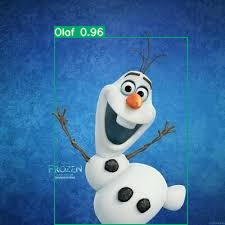

In [16]:
Image(filename='out_out/1.jpg', width=600)

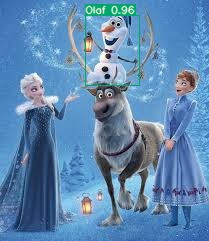

In [17]:
Image(filename='out_out/100.jpg', width=600)

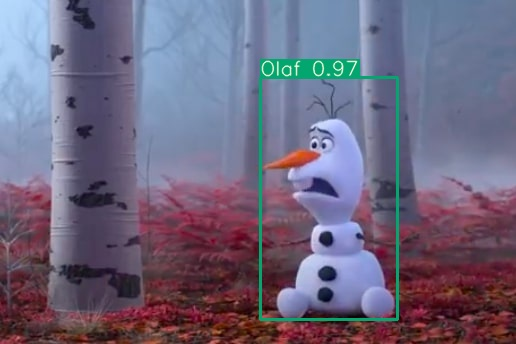

In [18]:
Image(filename='out_out/200.jpg', width=600)

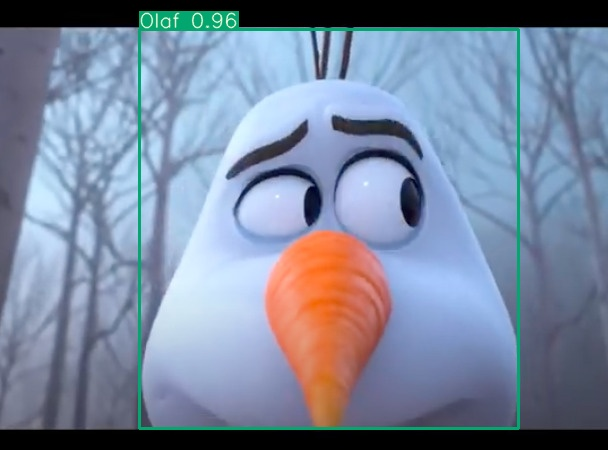

In [19]:
Image(filename='out_out/300.jpg', width=600)

## Run object detection on the extracted video frames using our new custom model

In [20]:
!python detect.py --conf-thres 0.2 --source '/content/YoloV3/videos' --output '/content/YoloV3/videoOut'

Namespace(agnostic_nms=False, augment=False, cfg='cfg/yolov3-custom.cfg', classes=None, conf_thres=0.2, device='', fourcc='mp4v', half=False, img_size=512, iou_thres=0.6, names='data/customdata/custom.names', output='/content/YoloV3/videoOut', save_txt=False, source='/content/YoloV3/videos', view_img=False, weights='weights/last.pt')
Using CUDA device0 _CudaDeviceProperties(name='Tesla P100-PCIE-16GB', total_memory=16280MB)

Model Summary: 225 layers, 6.25733e+07 parameters, 6.25733e+07 gradients
image 1/1180 /content/YoloV3/videos/image-001.jpg: 320x512 1 Olafs, Done. (0.019s)
image 2/1180 /content/YoloV3/videos/image-002.jpg: 320x512 1 Olafs, Done. (0.017s)
image 3/1180 /content/YoloV3/videos/image-003.jpg: 320x512 1 Olafs, Done. (0.017s)
image 4/1180 /content/YoloV3/videos/image-004.jpg: 320x512 1 Olafs, Done. (0.016s)
image 5/1180 /content/YoloV3/videos/image-005.jpg: 320x512 1 Olafs, Done. (0.016s)
image 6/1180 /content/YoloV3/videos/image-006.jpg: 320x512 1 Olafs, Done. (0.017s)


### Convert Object Detection Output Image To Video

In [23]:
# %cd videoOut/
!ffmpeg -framerate 30000/1210 -i image-%03d.jpg VideoOut.mp4
!cp VideoOut.mp4 "/content/gdrive/My Drive/EVA4/"

ffmpeg version 3.4.6-0ubuntu0.18.04.1 Copyright (c) 2000-2019 the FFmpeg developers
  built with gcc 7 (Ubuntu 7.3.0-16ubuntu3)
  configuration: --prefix=/usr --extra-version=0ubuntu0.18.04.1 --toolchain=hardened --libdir=/usr/lib/x86_64-linux-gnu --incdir=/usr/include/x86_64-linux-gnu --enable-gpl --disable-stripping --enable-avresample --enable-avisynth --enable-gnutls --enable-ladspa --enable-libass --enable-libbluray --enable-libbs2b --enable-libcaca --enable-libcdio --enable-libflite --enable-libfontconfig --enable-libfreetype --enable-libfribidi --enable-libgme --enable-libgsm --enable-libmp3lame --enable-libmysofa --enable-libopenjpeg --enable-libopenmpt --enable-libopus --enable-libpulse --enable-librubberband --enable-librsvg --enable-libshine --enable-libsnappy --enable-libsoxr --enable-libspeex --enable-libssh --enable-libtheora --enable-libtwolame --enable-libvorbis --enable-libvpx --enable-libwavpack --enable-libwebp --enable-libx265 --enable-libxml2 --enable-libxvid --ena

### Save changes to drive

In [0]:
cp -r /content/YoloV3 /content/gdrive/My\ Drive/EVA4/